In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
from scipy.stats import   ttest_1samp
from scipy.stats import ttest_1samp, ttest_ind


# Problem 1:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [3]:
df=pd.read_csv("Wholesale Customer.csv")
df.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


# EDA

In [89]:
df.shape

(440, 9)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [91]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [93]:
df.drop(['Buyer/Spender'], axis=1 , inplace=True)


In [94]:
list(df.columns)


['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [95]:
#Let's check the coorelation among all the categories:

products = df[df.columns[+2:df.columns.size]]
products

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Text(0.5, 1.0, 'Pearson correlation')

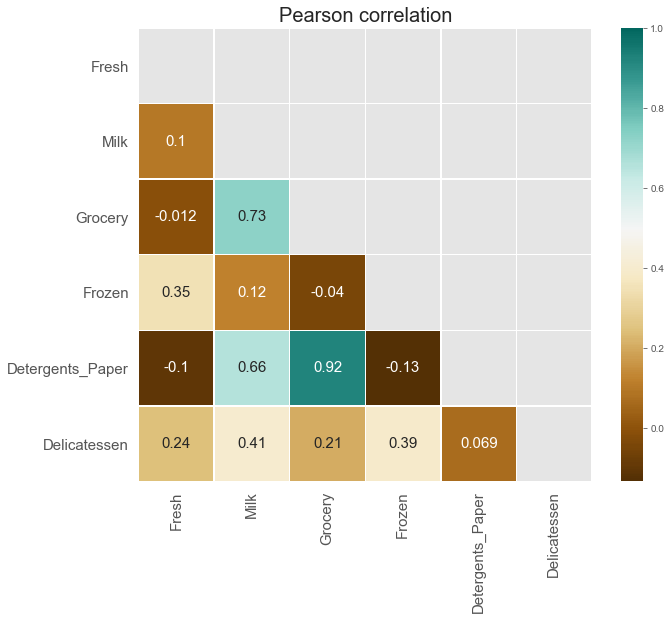

In [96]:
# Compute the Pearson correlation matrix
corr = products.corr()
plt.figure(figsize=(10,10))
plt.tick_params(labelsize=15, pad=6);
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap='BrBG'
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},annot=True,annot_kws={'size' : 15})
plt.title("Pearson correlation", fontsize =20)

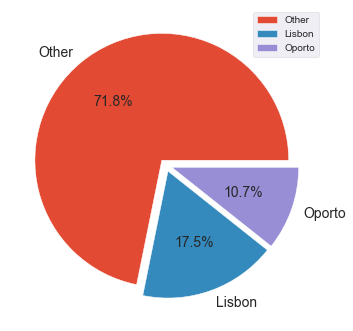

In [221]:
#Let's have a look at the Region and Channel:

plt.figure(figsize = (5,5))

labels = df.Region.value_counts().keys()
plt.pie(df.Region.value_counts(), autopct="%.1f%%",explode=[0.05,0.05,0.05],labels=labels,textprops={'fontsize': 14})
plt.legend()
plt.legend(loc='upper right')

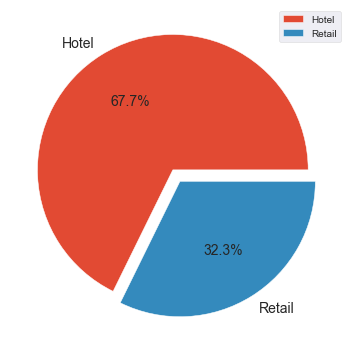

In [222]:
plt.figure(figsize = (5,5))
labels = df.Channel.value_counts().keys()
plt.pie(df.Channel.value_counts(), autopct="%.1f%%",explode=[0.05,0.05],labels=labels,textprops={'fontsize': 14})
plt.legend()
plt.legend(loc='upper right')

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [227]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [4]:
# Calculating the total spending across the Regions and Channels:

Spending= df[df.columns[:df.columns.size]]
Spending['Total_sum']=df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
Spending

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [100]:
region_channel_df = Spending.groupby(['Region','Channel'])['Total_sum'].sum()
print(region_channel_df)

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total_sum, dtype: int64


Text(0.5, 1.0, 'Total Spending')

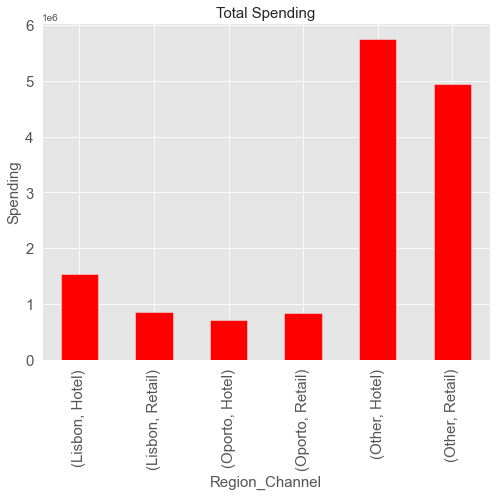

In [101]:
region_channel_df.plot(kind='bar',figsize = (7,7),color='r')
plt.tick_params(labelsize=15, pad=5);
plt.xlabel('Region_Channel', fontsize=15)
plt.ylabel('Spending', fontsize=15)
plt.title("Total Spending", fontsize =15)

In [103]:
df_Region=df.groupby('Region').sum()
df_Region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


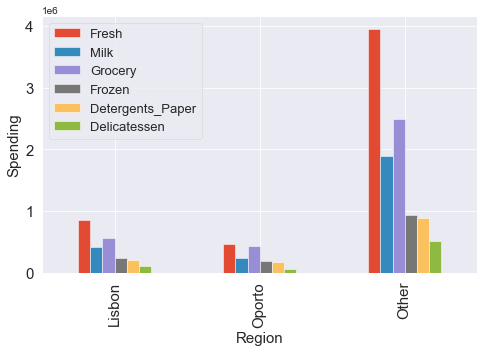

In [173]:
sns.set_style("darkgrid")

df_Region.plot(kind='bar',figsize = (7,5));
plt.tick_params(labelsize=15, pad=5);

plt.ylabel('Spending',fontsize=15)
plt.xlabel('Region', fontsize=15)
plt.legend(prop={"size":13})

In [105]:
print(Spending.groupby('Region')['Total_sum'].sum())


Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_sum, dtype: int64


In [106]:
df_channel=df.groupby('Channel').sum()
df_channel

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


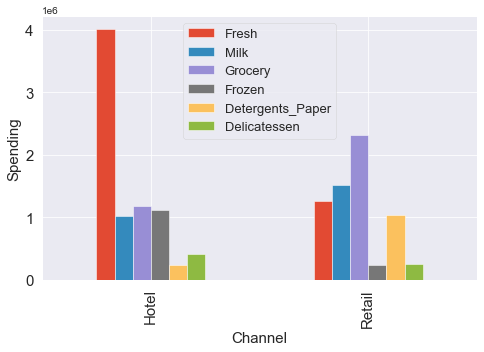

In [107]:
sns.set_style("darkgrid")

df_channel.plot(kind='bar',figsize = (7,5));
plt.tick_params(labelsize=15, pad=5);

plt.ylabel('Spending',fontsize=15)
plt.xlabel('Channel', fontsize=15)
plt.legend(prop={"size":13})

In [108]:
print(Spending.groupby('Channel')['Total_sum'].sum())

Channel
Hotel     7999569
Retail    6619931
Name: Total_sum, dtype: int64


# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

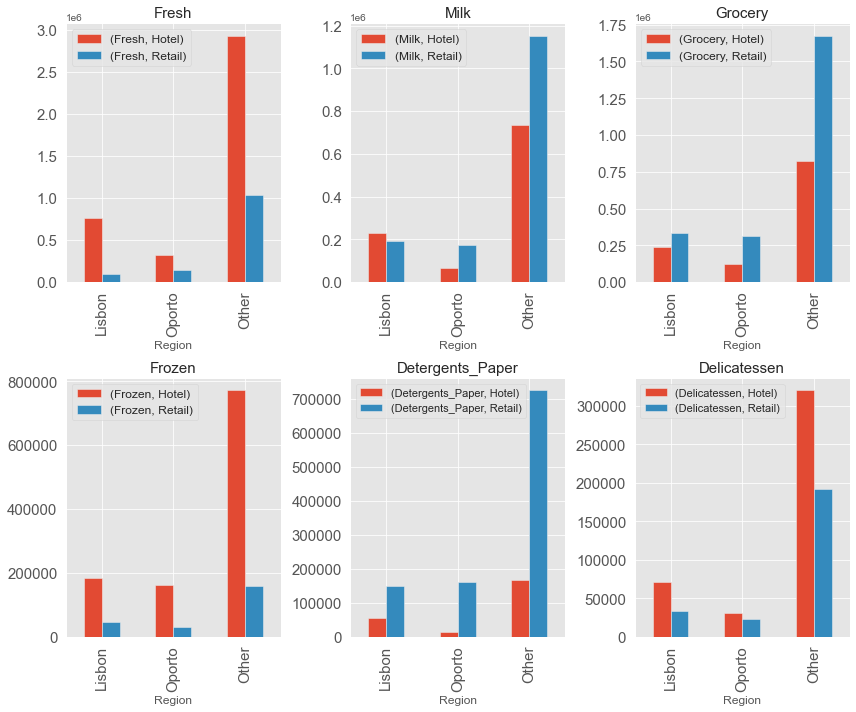

In [109]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

table1 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Fresh'],aggfunc=np.sum)
table2 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Milk'],aggfunc=np.sum)
table3 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Grocery'],aggfunc=np.sum)
table4 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Frozen'],aggfunc=np.sum)
table5 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Detergents_Paper'],aggfunc=np.sum)
table6 = pd.pivot_table(df,index=['Region'],columns=['Channel'],values=['Delicatessen'],aggfunc=np.sum)

ax = plt.subplot("231")
table1.plot(kind='bar',figsize=(10,10),ax=ax)
ax.set_title('Fresh',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":12})

ax = plt.subplot("232")
table2.plot(kind='bar',figsize=(12,10),ax=ax)
ax.set_title('Milk',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":12})

ax = plt.subplot("233")
table3.plot(kind='bar',figsize=(12,10),ax=ax)
ax.set_title('Grocery',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":12})

ax = plt.subplot("234")
table4.plot(kind='bar',figsize=(12,10),ax=ax)
ax.set_title('Frozen',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":12})

ax = plt.subplot("235")
table5.plot(kind='bar',figsize=(12,10),ax=ax)
ax.set_title('Detergents_Paper',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":11},loc='upper left')
 
ax = plt.subplot("236")
table6.plot(kind='bar',figsize=(12,10),ax=ax)
ax.set_title('Delicatessen',fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.tick_params(labelsize=15, pad=5);
plt.legend(prop={"size":11},loc="upper left")

   
fig.tight_layout()

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [110]:
df1=df.describe().T
df1= df1.reset_index().rename(columns={'index': 'items'})
df1

,items,count,mean,std,min,25%,50%,75%,max
0,Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
1,Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
2,Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
3,Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
4,Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
5,Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [223]:
from scipy.stats import variation
df1['cov']=variation(products, axis = 0)
df1

,items,count,mean,std,min,25%,50%,75%,max,cov
0,Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.052720
1,Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.271851
2,Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.193815
3,Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.578536
4,Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.652766
5,Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.847304


No handles with labels found to put in legend.


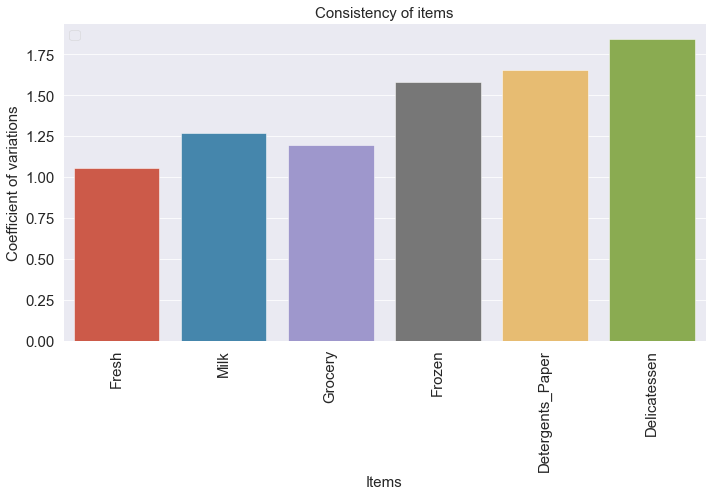

In [224]:
plt.figure(figsize=(10,7))

sns.barplot(x='items',y='cov',data=df1)
plt.tick_params(labelsize=15, pad=5);

plt.ylabel('Coefficient of variations',fontsize=15)
plt.xticks(rotation = 90)
plt.xlabel('Items', fontsize=15)
plt.title('Consistency of items',fontsize=15)
plt.legend(prop={"size":13})

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

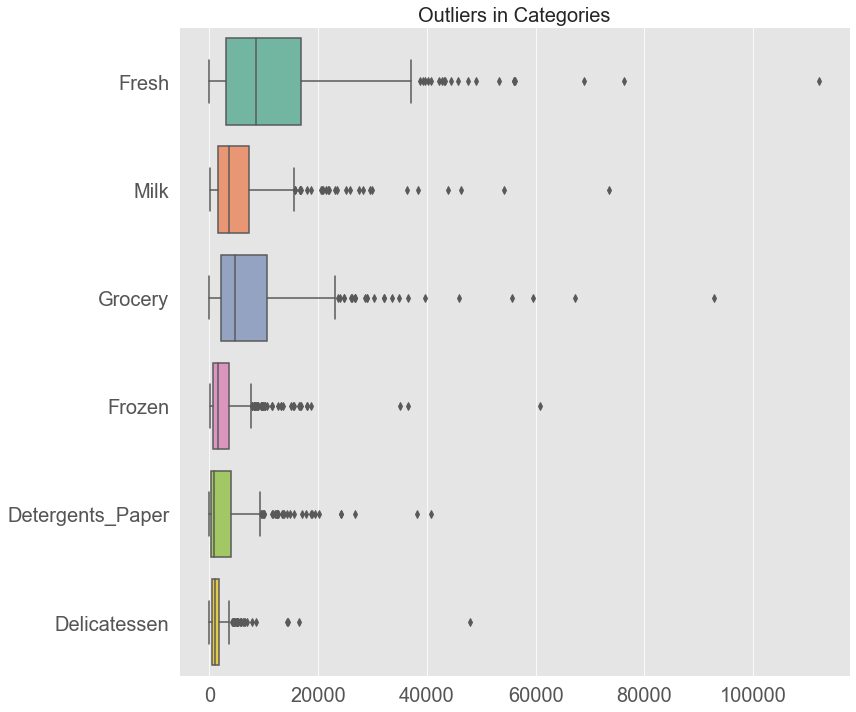

In [114]:
plt.figure(figsize=(12,10))
plt.title('Outliers in Categories',fontsize=20)
sns.boxplot(data=products, orient="h", palette="Set2")
plt.tick_params(labelsize=20, pad=6);

# Problem 2:
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [115]:
p= pd.read_csv('Survey-1.csv')

In [116]:
p.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


# 2.1.1. Gender and Major

In [117]:
pd.crosstab(p['Gender'],p['Major'],margins=True,margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


# 2.1.2. Gender and Grad Intention

In [118]:
pd.crosstab(p['Gender'],p['Grad Intention'],margins=True,margins_name="Total")

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


# 2.1.3. Gender and Employment

In [119]:
pd.crosstab(p['Gender'],p['Employment'],margins=True,margins_name="Total")

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


# 2.1.4. Gender and Computer

In [120]:
pd.crosstab(p['Gender'],p['Computer'],margins=True,margins_name="Total")

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


# 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:



# 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [121]:
p.Gender.count()

62

In [122]:
p.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [123]:
prob_males= round(p.Gender.value_counts()[1]/p.Gender.count(),4)*100
print('Probability that a randomly selected CMSU student will be male is %1.2f' % prob_males +'%.')


Probability that a randomly selected CMSU student will be male is 46.77%.


# 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [124]:
prob_females= round(p.Gender.value_counts()[0]/p.Gender.count(),4)*100
print('Probability that a randomly selected CMSU student will be female is %1.2f' % prob_females +'%.')

Probability that a randomly selected CMSU student will be female is 53.23%.


# 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [125]:
pd.crosstab(p['Gender'],p['Major'],margins=True,margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [126]:
p_acc_m= (4/29)*100
p_CIS_m= (1/29)*100
p_Economics_Finance_m = (4/29)*100
p_International_Business_m = (2/29)*100
p_Management_m = (6/29)*100
p_Other_m = (4/29)*100
p_Retailing_Marketing_m = (5/29)*100
p_Undecided_m = (3/29)*100


In [127]:
print('Probability of Accounting among the male students is %1.2f' % p_acc_m +'%')
print('Probability of CIS among the male students is %1.2f' % p_CIS_m +'%')
print('Probability of Economics/Finance among the male students is %1.2f' % p_Economics_Finance_m +'%')
print('Probability of International Business among the male students is %1.2f' % p_International_Business_m +'%')
print('Probability of Management among the male students is %1.2f' % p_Management_m +'%')
print('Probability of Other among the male students  %1.2f' % p_Other_m +'%')
print('Probability of Retailing/Marketing among the male students is %1.2f' % p_Retailing_Marketing_m +'%')
print('Probability of Undecided among the male students is %1.2f' % p_Undecided_m +'%')


Probability of Accounting among the male students is 13.79%
Probability of CIS among the male students is 3.45%
Probability of Economics/Finance among the male students is 13.79%
Probability of International Business among the male students is 6.90%
Probability of Management among the male students is 20.69%
Probability of Other among the male students  13.79%
Probability of Retailing/Marketing among the male students is 17.24%
Probability of Undecided among the male students is 10.34%


# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [128]:
p_acc_f= (3/29)*100
p_CIS_f= (3/29)*100
p_Economics_Finance_f = (7/29)*100
p_International_Business_f = (4/29)*100
p_Management_f= (4/29)*100
p_Other_f= (3/29)*100
p_Retailing_Marketing_f= (9/29)*100
p_Undecided_f = (0/29)*100

In [129]:
print('Probability of Accounting among the female students is %1.2f' % p_acc_f +'%')
print('Probability of CIS among the female students is %1.2f' % p_CIS_f +'%')
print('Probability of Economics/Finance among the female students is %1.2f' % p_Economics_Finance_f +'%')
print('Probability of International Business among the female students is %1.2f' % p_International_Business_f +'%')
print('Probability of Management among the female students is %1.2f' % p_Management_f +'%')
print('Probability of Other among the female students  %1.2f' % p_Other_f +'%')
print('Probability of Retailing/Marketing among the female students is %1.2f' % p_Retailing_Marketing_f +'%')
print('Probability of Undecided among the female students is %1.2f' % p_Undecided_f +'%')


Probability of Accounting among the female students is 10.34%
Probability of CIS among the female students is 10.34%
Probability of Economics/Finance among the female students is 24.14%
Probability of International Business among the female students is 13.79%
Probability of Management among the female students is 13.79%
Probability of Other among the female students  10.34%
Probability of Retailing/Marketing among the female students is 31.03%
Probability of Undecided among the female students is 0.00%


# 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [130]:
pd.crosstab(p['Gender'],p['Grad Intention'],margins=True,margins_name="Total")

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [131]:
p_grad_m= (17/29)
p_m= (29/62)

In [132]:
P_m_g=(p_m*p_grad_m)*100

In [133]:
print('Probability a randomly chosen student is a male and intends to graduate %1.2f' % P_m_g +'%')

Probability a randomly chosen student is a male and intends to graduate 27.42%


# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [134]:
pd.crosstab(p['Gender'],p['Computer'],margins=True,margins_name="Total")

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [135]:
p_nolap_f= 1- (29/33)
p_f= (33/62)

In [136]:
p_f_nolap= (p_f*p_nolap_f)*100

In [137]:
print('Probability that a randomly selected student is a female and does NOT have a laptop %1.2f' % p_f_nolap +'%')

Probability that a randomly selected student is a female and does NOT have a laptop 6.45%


# 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [138]:
pd.crosstab(p['Gender'],p['Employment'],margins=True,margins_name="Total")

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [139]:
p_m= 29/62
p_s_fulltime= 10/62
p_m_fulltime= 7/62

In [140]:
p_m_or_fulltime= (29/62 + 10/62 - 7/62)*100
p_m_or_fulltime

51.61290322580645

In [141]:
print('Probability that a randomly chosen student is either a male or has full-time employment is %1.2f' % p_m_or_fulltime +'%') 

Probability that a randomly chosen student is either a male or has full-time employment is 51.61%


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [142]:
pd.crosstab(p['Gender'],p['Major'],margins=True,margins_name="Total")

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [143]:
p_International_Business_f = (4/33)
p_Management_f= (4/33)
p_int_man= (p_International_Business_f + p_Management_f)*100

In [144]:
print('Probability of international business or management given Female is %1.2f' % p_int_man +'%')

Probability of international business or management given Female is 24.24%


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [145]:
d=p[p['Grad Intention']!='Undecided']
d.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [146]:
pd.crosstab(d['Gender'],d['Grad Intention'],margins=True,margins_name="Total")

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [147]:
#Here, we need to prove : P(F ∩ Yes) = P(F) * P(Yes)


In [148]:
p_yes= 28/40
p_female= 20/40
p_Female_yes=11/20

In [149]:
print('P(F)* P(Yes) =',p_yes * p_female)

P(F)* P(Yes) = 0.35


In [150]:
print('P(F ∩ Yes) =',p_Female_yes)

P(F ∩ Yes) = 0.55


In [151]:
#Hence, not independent events.

# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [152]:
m=p.GPA.mean()
print('The mean of GPA for all the students is', m)

The mean of GPA for all the students is 3.129032258064516


In [153]:
print('If a student is chosen randomly,the probability that his/herGPA is less than 3 is',round(stats.poisson.cdf(2,m),3)*100,'%')

If a student is chosen randomly,the probability that his/herGPA is less than 3 is 39.5 %


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [154]:

data_male= p[(p['Gender']=='Male')]
data_male.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100


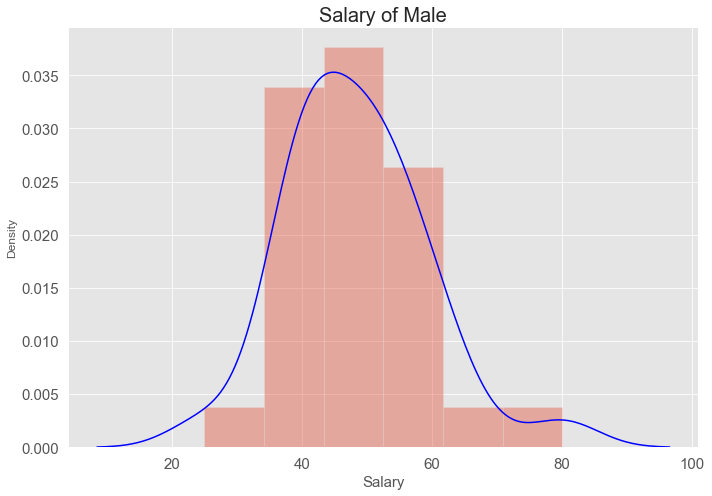

In [155]:
plt.figure(figsize=(10,7))
plt.title('Salary of Male',fontsize=20)
plt.xlabel('Salary', fontsize=15)
sns.distplot(data_male['Salary'],kde_kws={'color':'b'})
plt.tick_params(labelsize=15, pad=6);

In [156]:
data_mean=p[(p['Gender']=='Male') & (p['Salary']>=50)]['Salary'].mean()
data_mean


56.857142857142854

In [157]:
data_std =p[(p['Gender']=='Male') & (p['Salary']>=50)]['Salary'].std()
data_std

8.141603913585719

In [158]:
print('The Conditional probability that a randomly selected male earns 50 or more is', round(1-stats.norm.cdf(49,data_mean,data_std),3)*100,'%')


The Conditional probability that a randomly selected male earns 50 or more is 83.3 %


In [159]:
data_female= p[(p['Gender']=='Female')]
data_female.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


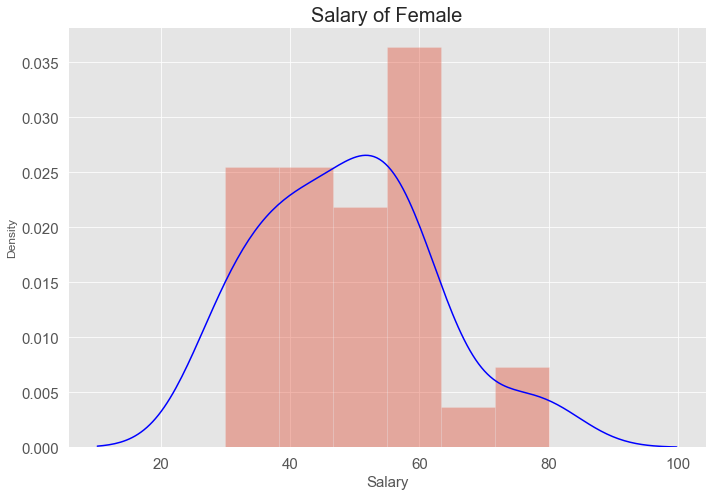

In [160]:
plt.figure(figsize=(10,7))
plt.title('Salary of Female',fontsize=20)
plt.xlabel('Salary', fontsize=15)
sns.distplot(data_female['Salary'],kde_kws={'color':'b'})
plt.tick_params(labelsize=15, pad=6);

In [161]:
data_mean1= p[(p['Gender']=='Female') & (p['Salary']>=50)]['Salary'].mean()
data_mean1

58.5

In [162]:
data_std1 = p[(p['Gender']=='Female') & (p['Salary']>=50)]['Salary'].std()
data_std1

9.102359099512093

In [163]:
print('The Conditional probability that a randomly selected female earns 50 or more is', round(1-stats.norm.cdf(49,data_mean1,data_std1),3)*100,'%')


The Conditional probability that a randomly selected female earns 50 or more is 85.2 %


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

Text(0.5, 1.0, 'Text Messages')

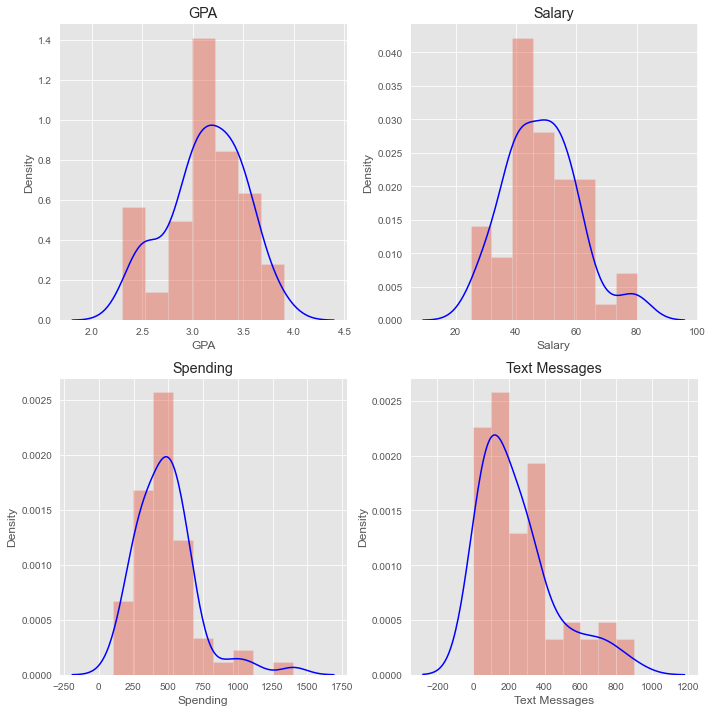

In [164]:

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True


fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.725, wspace=0.725)


sns.distplot(p['GPA'],kde_kws={'color':'b'},ax = axes[0,0])
sns.distplot(p['Salary'],kde_kws={'color':'b'},ax = axes[0,1])
sns.distplot(p['Spending'],kde_kws={'color':'b'},ax = axes[1,0])
sns.distplot(p['Text Messages'],kde_kws={'color':'b'},ax = axes[1,1])

axes[0,0].set_title("GPA")
axes[0,1].set_title("Salary")
axes[1,0].set_title("Spending")
axes[1,1].set_title("Text Messages")



In [208]:
from scipy.stats import shapiro
# normality test
stat, p1 = shapiro(p['GPA'])

print('Statistics=%.3f, p1=%.3f' % (stat, p1))

Statistics=0.969, p1=0.112


In [209]:
stat1, p2 = shapiro(p['Salary'])

print('Statistics=%.3f, p2=%.3f' % (stat1, p2))

Statistics=0.957, p2=0.028


In [200]:
stat2, p3 = shapiro(p['Spending'])

print('Statistics=%.3f, p3=%.5f' % (stat2, p3))

Statistics=0.878, p3=0.00002


In [215]:
stat3, p4 = shapiro(p['Text Messages'])

print('Statistics=%.3f, p4=%.7f' % (stat3, p4))

Statistics=0.859, p4=0.0000043


In [225]:
print('Shapiro test for GPA is stat:',0.969,' p_value: ',0.112)
print('Shapiro test for Salary is stat:',0.957,'p_value: ',0.028)
print('Shapiro test for Spending is stat:',0.878, 'p_value: ',0.0002)
print('Shapiro test for Text Messages is stat:',0.859,'p_value: ',0.000004)

Shapiro test for GPA is stat: 0.969  p_value:  0.112
Shapiro test for Salary is stat: 0.957 p_value:  0.028
Shapiro test for Spending is stat: 0.878 p_value:  0.0002
Shapiro test for Text Messages is stat: 0.859 p_value:  4e-06


In [214]:
data=p[['GPA','Salary','Spending','Text Messages']]
d=data.skew(axis = 0, skipna = True)
d

GPA             -0.314600
Salary           0.534701
Spending         1.585915
Text Messages    1.295808
dtype: float64

In [167]:
df = pd.DataFrame(d, columns =['Skewness'], dtype = float) 
df

,Skewness
GPA,-0.314600
Salary,0.534701
Spending,1.585915
Text Messages,1.295808


# Problem 3:
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [168]:
hyp=pd.read_csv("A & B shingles-1.csv")

In [169]:
hyp.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [170]:
hyp.count()

A    36
B    31
dtype: int64

In [171]:
hyp.isnull().sum()

A    0
B    5
dtype: int64

# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [ ]:
# We perform one sample t-test for A & B shingles individually.

#For A shingles,
#H0 : mean moisture content <=0.35
#HA : mean moisture content > 0.35

In [ ]:
#Level of significance: 0.05

In [175]:
t_statistic, p_value = ttest_1samp(hyp['A'], 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.14955266289815025 


In [177]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", round((p_value/2),3))

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= 0.075


In [ ]:
#For B shingles,
#H0 : mean moisture content <=0.35
#HA : mean moisture content > 0.35


In [178]:
t_statistic, p_value = ttest_1samp(hyp['B'], 0.35,nan_policy='omit')
print('One sample t test \nt statistic: {0} p value1: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: -3.1003313069986995 p value1: 0.004180954800638365 


In [180]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", round((p_value/2),3))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.002


# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [ ]:
#Here, we perform two sample t-test:

#H0 : mean moisture content of A = mean moisture content of B
#HA : mean moisture content of A≠mean moisture content of B

In [ ]:
#Level of significance: 0.05

In [181]:
t_statistic, p_value  = ttest_ind(hyp['A'],hyp['B'],equal_var=True,nan_policy='omit')
print('t_statistic',t_statistic)    
print('P Value',round(p_value,3))    


t_statistic 1.2896282719661123
P Value 0.202


In [228]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our two-sample t-test p-value=", round(p_value,3))

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our two-sample t-test p-value= 0.202
